Rosenberg Lancet:
> Response to atezolizumab occurred in all TCGA subtypes but was significantly higher in the luminal cluster II subtype than in other subtypes, which showed an objective response rate of 34% (p=0·0017, figure 3G), compared with 10% for subtype I, 16% for subtype III, and 20% for subtype IV.

Luminal := clusters 1, 2

Basal := clusters 3,4

In [1]:
%load_ext autoreload
%autoreload 2

import sys 
from os import getcwd, path
sys.path.append(path.dirname(getcwd()))
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
from cohorts.functions import *
%matplotlib inline

In [2]:
from utils import data

In [3]:
from cohorts.plot import mann_whitney_plot
from cohorts.plot import fishers_exact_plot

In [4]:
from utils.paper import *

In [5]:
cohort = data.init_cohort(join_with=["genentech_tcga_subtypes"])
df = cohort.as_dataframe()

inner join with genentech_tcga_subtypes: 25 to 20 rows
inner join with genentech_tcga_subtypes: 25 to 20 rows
{'dataframe_hash': -7937148208254620035,
 'provenance_file_summary': {u'cohorts': u'0.4.0+3.gda968fb',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}
inner join with genentech_tcga_subtypes: 25 to 20 rows


# Benefit vs. Luminal or Basal Subtype

inner join with genentech_tcga_subtypes: 25 to 20 rows
basal     False  True 
Response              
DCB           4      4
No DCB        5      7
Fisher's Exact Test: OR: 1.4, p-value=1.0 (two-sided)
{{{basal_plot}}}
{{{basal_benefit:50%}}}
{{{basal_no_benefit:58%}}}
{{{basal_fishers:n=20, Fisher's Exact p=1.00}}}


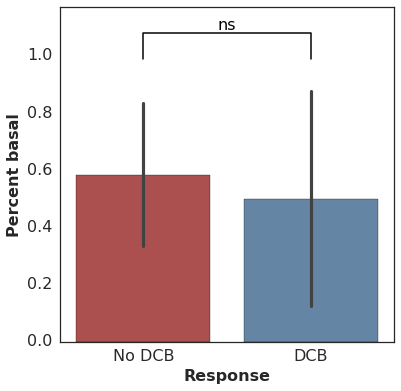

In [6]:
fishers_exact_hyper_label_printer(cohort.plot_benefit(on = "basal"), label="basal")

In [7]:
def basal(row, cohort):
    return row["basal"]

inner join with genentech_tcga_subtypes: 25 to 20 rows
# no condition 9
# with condition 11


inner join with genentech_tcga_subtypes: 25 to 20 rows
# no condition 9
# with condition 11


<lifelines.StatisticalResult: 
Results
   df: 1
   alpha: 0.95
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.20435 |              1.611 |  Cannot Reject Null |       False       
>

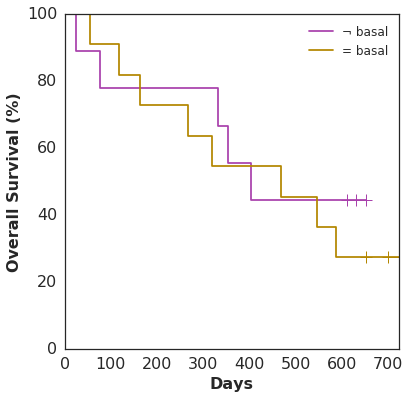

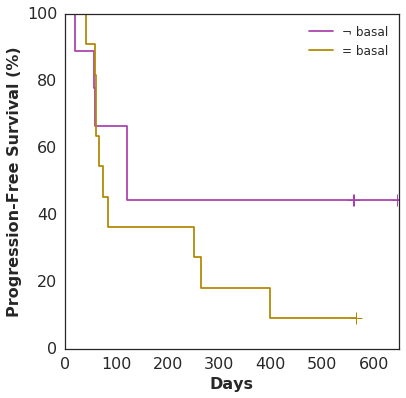

In [8]:
cohort.plot_survival(on="basal", how="os")
cohort.plot_survival(on="basal", how="pfs")

# Benefit vs. Four TCGA Subtypes

In [9]:
import matplotlib.colors as colors


In [10]:
import readline
import rpy2.robjects as robjects
from rpy2.robjects import FloatVector
from rpy2.robjects.packages import importr

stats = importr('stats')
r = robjects.r

In [11]:
sdf = df[["TCGA Subtype", "is_benefit"]]
sdf["num"] = pd.Series(np.ones(len(sdf)))
pvt = pd.pivot_table(data = sdf, 
               index = "TCGA Subtype",
               columns = "is_benefit",
               values = "num", aggfunc = np.sum, fill_value=0).reset_index(level=0)

pvt.columns = ["TCGA Subtype", "F", "T"]

/home/tavi/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
contingency_table = pd.crosstab(df["TCGA Subtype"], df["is_benefit"])

In [13]:
adf = pd.DataFrame(pvt.values, columns=["TCGA Subtype", "no benefit", "benefit"])
adf["Total Patients"] = adf["benefit"] + adf["no benefit"]
adf["Percent Benefit"] = adf["benefit"] / adf["Total Patients"]

adf["% " + cohort.benefit_plot_name] = adf["Percent Benefit"].apply(lambda x: "%2.f" % (100*x))

In [14]:
adf

,TCGA Subtype,no benefit,benefit,Total Patients,Percent Benefit,% DCB
0,I,2,2,4,0.5,50
1,II,3,2,5,0.4,40
2,III,4,0,4,0,0
3,IV,3,4,7,0.571429,57


In [15]:
print "WARNING: change these if cohorts.styling is changed"
blue = colors.hex2color("#5a86ad")
red = colors.hex2color("#bb3f3f")

{{{subtype_patients}}}


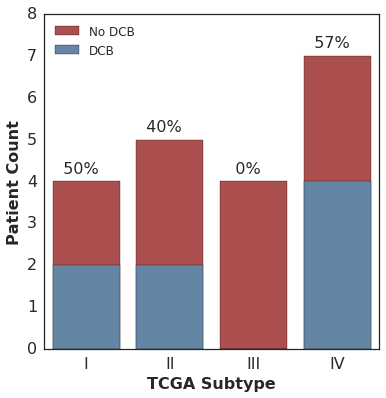

In [16]:
f, ax = plt.subplots()

#sb.set_color_codes("pastel")
sb.barplot(y = "Total Patients", x = "TCGA Subtype", data = adf, label = "No " + cohort.benefit_plot_name, color = red)

#sb.set_color_codes("muted")
sb.barplot(y = "benefit", x = "TCGA Subtype", data = adf, label = cohort.benefit_plot_name, color = blue)
          #palette = mcp)

ax.legend(ncol=1, loc="upper left")
ax.set(ylabel="Patient Count")
ax.set(ylim=[0,8])

percents = adf["% " + cohort.benefit_plot_name].values

for (p, percent) in zip(ax.patches[:4], percents):
    height = p.get_height()
    ax.text(p.get_x(), height+.2, "  " + percent + "%")

hyper_figure_label_printer("subtype_patients")

In [17]:
a = list(contingency_table.values[:,0])
b = list(contingency_table.values[:,1])

v = a + b

m = r.matrix(robjects.IntVector(v), ncol = 2)

result = stats.fisher_test(m)

import pandas.rpy.common as com
pyresultdict = com.convert_robj(result)

for k, v in  pyresultdict.items():
    print(k, v)

('data.name', array(['structure(c(2L, 3L, 4L, 3L, 2L, 2L, 0L, 4L), .Dim = c(4L, 2L))'], dtype=object))
('alternative', array(['two.sided'], dtype=object))
('method', array(["Fisher's Exact Test for Count Data"], dtype=object))
('p.value', [0.3631817099309312])


/home/tavi/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html


In [18]:
from cohorts.rounding import float_str

In [19]:
n = len(sdf)

In [20]:
clusters_fisher_pvalue = pyresultdict["p.value"][0]

str_pvalue = float_str(clusters_fisher_pvalue)

text = "four_clusters_fisher:n=%d, Fisher's Exact p=%s" % (n, str_pvalue)

print "{{{%s}}}" % text

{{{four_clusters_fisher:n=20, Fisher's Exact p=0.36}}}
